In [1]:
import os
import cv2
import keras
import random
import numpy as np
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator ,load_img
from keras.layers.normalization import BatchNormalization
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


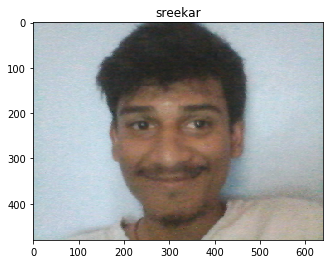

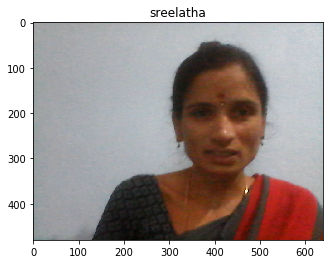

In [24]:
train_dir = "dataset"
one_from_each = []
titles = []
classes = os.listdir(train_dir)
n_classes = len(classes)
for x in classes:
    unique_img_dir = train_dir + '/' + x
    temp_directory = os.listdir(unique_img_dir)
    temp_img = unique_img_dir + '/' + temp_directory[random.randint(1,10)]
    image = cv2.imread(temp_img)
    image = np.array(image)
    image = image.astype('float32')/255.0
    one_from_each.append(image)
    titles.append(x)
    
for i in range(2):
    imageshow = one_from_each[i]
    plt.imshow(imageshow[:,:,::-1])
    plt.title(titles[i])
    plt.show()

In [25]:
print(classes)
labels_dict = {0:classes[0],
               1:classes[1]
              }

['sreekar', 'sreelatha']


In [26]:
classes[0]

'sreekar'

In [5]:
def load_data(directory):
    size = 48,48
    images = []
    labels = []
    
    for folder in os.listdir(directory):
        print("Loading images from : ",folder, ": ", end="")
        for file in os.listdir(directory + "/" + folder):
            img_path = directory + "/" + folder + "/" + file
            curr_img = cv2.imread(img_path)
            curr_img = cv2.resize(curr_img, size)
            images.append(curr_img)
            if folder == labels_dict[0]:
                current_label = 0
            else:
                current_label=1
            labels.append(current_label)
        print("completed")
    
    images, labels = shuffle(images, labels)
    images = np.array(images)
    images = images.astype('float32')/255.0
    labels = np.array(labels)
    labels = keras.utils.to_categorical(labels, n_classes)
    
    return images, labels

In [6]:
X_train, Y_train = load_data(train_dir)

Loading images from :  sreekar : completed
Loading images from :  sreelatha : completed


In [7]:
X_train.shape

(907, 48, 48, 3)

In [8]:
def create_convolutional_model(classes):
    model = Sequential()
    model.add(Conv2D(32,kernel_size=(2,2),strides=(1,1),activation='relu',input_shape=(48,48,3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(filters=64,kernel_size=(2,2),strides=(1,1),activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))
    model.add(Dropout(0.25))#to prevent neural network from overfitting
    
    model.add(Conv2D(filters=128,kernel_size=(2,2),strides=(1,1),activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(filters=256,kernel_size=(2,2),strides=(1,1),activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    
    model.add(Dense(256,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(512,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(classes,activation='softmax'))
    
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model 

In [9]:
classes=2
model = create_convolutional_model(classes)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 47, 47, 32)        416       
_________________________________________________________________
batch_normalization_1 (Batch (None, 47, 47, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        8256      
_________________________________________________________________
batch_normalization_2

In [15]:
from keras import backend as K
import tensorflow as tf
def auc(true_labels,predictions,weights=None):
    auc=tf.metrics.auc(true_labels,predictions,weights=weights)[1]
    K.get_session().run(tf.local_variables_initializer())

In [17]:
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
model.fit(X_train,Y_train,batch_size=105,epochs=15,verbose=2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/15
 - 12s - loss: 0.1471 - acc: 0.9361
Epoch 2/15
 - 6s - loss: 6.2982e-04 - acc: 1.0000
Epoch 3/15
 - 7s - loss: 1.6757e-04 - acc: 1.0000
Epoch 4/15
 - 6s - loss: 2.5308e-04 - acc: 1.0000
Epoch 5/15
 - 6s - loss: 4.6434e-05 - acc: 1.0000
Epoch 6/15
 - 7s - loss: 5.1927e-05 - acc: 1.0000
Epoch 7/15
 - 6s - loss: 6.1481e-05 - acc: 1.0000
Epoch 8/15
 - 7s - loss: 3.8209e-05 - acc: 1.0000
Epoch 9/15
 - 6s - loss: 1.6586e-05 - acc: 1.0000
Epoch 10/15
 - 7s - loss: 1.4834e-05 - acc: 1.0000
Epoch 11/15
 - 7s - loss: 1.3018e-05 - acc: 1.0000
Epoch 12/15
 - 7s - loss: 1.4630e-05 - acc: 1.0000
Epoch 13/15
 - 6s - loss: 1.3582e-05 - acc: 1.0000
Epoch 14/15
 - 7s - loss: 1.3912e-05 - acc: 1.0000
Epoch 15/15
 - 7s - loss: 1.0582e-05 - acc: 1.0000


In [12]:
X_train.shape

(907, 48, 48, 3)

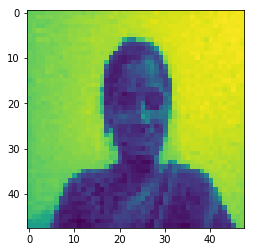

In [13]:
plt.imshow(X_train[87][:,:,0])


In [18]:
filename='gpu_model_epochs.hdf5'
model.save_weights(filename,overwrite=True)

In [19]:
filename='gpu_model_epochs.hdf5'
model.load_weights(filename)

In [20]:
from keras.models import load_model
import cv2

In [21]:
import cv2
def make_prediction(unknown):
    unknown=cv2.resize(unknown,(48,48))
    unknown=unknown/255.0
    unknown=np.array(unknown).reshape(-1,48,48,3)
    predict=np.argmax(model.predict(unknown),axis = 1)
    return predict[0] 

In [22]:
def face_in_video():
    face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
    cap=cv2.VideoCapture(0)
    while True:
        ret,img=cap.read()  
         #gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(img,1.3,5)
        
        for (x,y,w,h) in faces:
            sub_face = img[y:y+h, x:x+w]
            cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
            res=make_prediction(sub_face)
            font = cv2.FONT_HERSHEY_SIMPLEX
            cv2.putText(img,str(classes[int(res)]),(x,y-5),font,0.9,(205,200,50),2,cv2.LINE_AA)
        cv2.imshow('show your fucking face',img)
        if cv2.waitKey(1) & 0xFF ==ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows() 

In [ ]:
face_in_video()

In [8]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
uploaded=files.upload()
for fn in upload.keys():
    path="./dataset/"
    img=image.load_img(path,target_size=(150,150))
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    images=np.vstack([x])
    classes=model.predict(images,batch_size=10)
    print(fn)
    print(classes)

ModuleNotFoundError: No module named 'google.colab'

In [7]:
!pip install google

  Stored in directory: C:\Users\sreekar chidurala\AppData\Local\pip\Cache\wheels\ac\25\a4\837e13b998311f9824965755f86ecf69ef9ee1a7db10834cfc
Successfully built google
